In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])
plt.rcParams.update({
    "font.family": "Arial",   # specify font family here
    "font.serif": ["sans-serif"],  # specify font here
    "font.size":11})          # specify font size here

from scipy import constants
from scipy.integrate import odeint

#Import personal functions
import sys
#sys.path.append("C:/Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Functions")
#sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
sys.path.append("C:/Users/Olivi/Documents/Git/SoRoMa/Thermal_Soft_Robotics_data/Functions")

import FluidicSetupFunctions
from save_plot_func import save_plot

In [2]:
#Location = r"\\sun\overvelde\group-folder\PROJECTS\Thermal_soft_robotics_Olivier\Git\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Demo"
Location = r"C:\Users\Olivi\Documents\Git\SoRoMa\Thermal_soft_robotics_data\Thermal_actuation\Experimental\Fluidic\Pressure2flow_repeat"
Foldernames = ["//Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 3
Loading... Folder 1 of 1, Sample 2 of 3
Loading... Folder 1 of 1, Sample 3 of 3


In [3]:
data[1]['Samplename']

['05L_1740mg_ai2_3700mh_ai4_flow',
 '05L_3700mh_ai4_+valve_flow',
 '05L_3700mh_ai4_+valve+ actuator']

AWM10-5
AWM15-13
SSCDP15-4
SSCDP30-2
Time
[19.822233264181374]


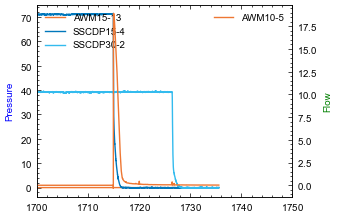

In [4]:
df = data[0][0]
time_column = 'Time'
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Flow', color='green')
ax1.set_ylabel('Pressure', color='blue')
V = []

# Iterate through each column (except the time column)
for column in df.columns:
    if column != time_column:
        if 'AWM10-5' in column:
            # Plot on right y-axis
            ax2.plot(df[time_column], df[column], label=column)
            V.append(np.trapz(df[column], df[time_column]))
            
        elif 'MPX' in column:
            continue 
        else:
            # Plot on left y-axis
            ax1.plot(df[time_column], df[column]/1000, label=column)
    print(column)

#ax1.set_xlim(1500,1750)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlim(1700,1750)
print(V)

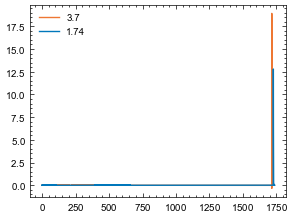

In [5]:
for i, df in enumerate(data[0]):
    t = data[0][i]['Time'] 

    if 'AWM10-5' in df.columns:
        Q1 = df['AWM10-5'] 
        label = "3.7"
        plt.plot(t, Q1, label=label)
        
    if 'AWM15-13' in df.columns:
        Q2 = df['AWM15-13'] 
        label = "1.74"
        plt.plot(t, Q2, label=label)

    if 'SSCDP15-4' in df.columns:
        P1 = df['SSCDP15-4'] 
        label = "3.7"
        #plt.plot(t, P1, label=label)

    if 'SSCDP30-2' in df.columns:
        P2 = df['SSCDP30-2'] 
        label = "1.74"
        #plt.plot(t, P2, label=label)
    break 

plt.legend()
#plt.xlim(1700,1750)


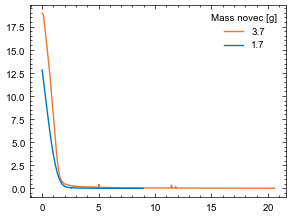

In [6]:

# Find the index of the maximum value in Q1 and Q2
index_max_Q1 = Q1.argmax()
index_max_Q2 = Q2.argmax()

# Use these indices to slice the data for plotting
Q1_from_max = Q1[index_max_Q1:]
P1_from_max = P1[index_max_Q1:]
t_Q1_from_max = t[index_max_Q1:] -t[index_max_Q1] # Assuming 't' is your time or x-axis data

Q2_from_max = Q2[index_max_Q2:]
P2_from_max = P2[index_max_Q2:]
t_Q2_from_max = t[index_max_Q2:]-t[index_max_Q2]   # Assuming 't' is the same for Q2


# Plotting
plt.plot(t_Q1_from_max, Q1_from_max, label='3.7')
plt.plot(t_Q2_from_max, Q2_from_max, label='1.7')

plt.legend(title="Mass novec [g]", title_fontsize='7')
plt.show()


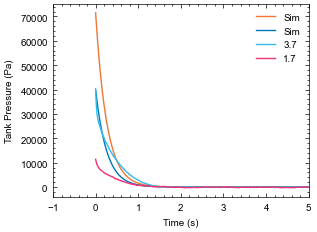

In [10]:


# Define P_amb and R_valve (values assumed for example)
P_amb = 1e5  # Ambient pressure in Pascals
R_valve = 500   # Resistance of the valve

# Given data
P1_max = max(P1)+P_amb  # Assuming P1 is defined
P2_max = max(P2)+P_amb # Assuming P2 is defined
V_tank = 0.525e-3



# System of ODEs
def dPdt(P, t):
    P_tank = P[0]
    Q_tank_to_amb = (P_tank - P_amb) / R_valve
    dP_tank_dt = -Q_tank_to_amb / V_tank
    return [dP_tank_dt]

# Time array for simulation
t_sim = np.linspace(0, 5, 200)

# Run simulation for each starting point
P_tank_P1_max = odeint(dPdt, [P1_max], t_sim)
P_tank_P2_max = odeint(dPdt, [P2_max], t_sim)

# Plotting
plt.plot(t_sim, P_tank_P1_max-P_amb, label='Sim')
plt.plot(t_sim, P_tank_P2_max-P_amb, label='Sim')
plt.plot(t_Q1_from_max, P1_from_max, label='3.7')
plt.plot(t_Q2_from_max, P2_from_max, label='1.7')

plt.xlabel('Time (s)')
plt.ylabel('Tank Pressure (Pa)')
plt.legend()
plt.xlim(-1,5)
plt.show()


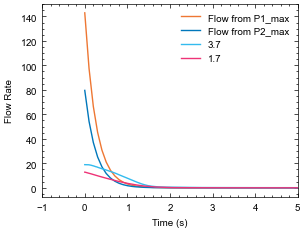

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define P_amb and R_valve
P_amb = 1e5  # Ambient pressure in Pascals
R_valve = 500   # Resistance of the valve

# Given data
P1_max = max(P1) + P_amb  # Assuming P1 is defined
P2_max = max(P2) + P_amb  # Assuming P2 is defined
V_tank = 0.525e-3

# System of ODEs
def dPdt(P, t):
    P_tank = P[0]
    Q_tank_to_amb = (P_tank - P_amb) / R_valve
    dP_tank_dt = -Q_tank_to_amb / V_tank
    return [dP_tank_dt]

# Time array for simulation
t_sim = np.linspace(0, 20, 200)

# Run simulation for each starting point
P_tank_P1_max = odeint(dPdt, [P1_max], t_sim)[:, 0]
P_tank_P2_max = odeint(dPdt, [P2_max], t_sim)[:, 0]

# Calculate the flow for each time step
Q_P1_max = (P_tank_P1_max - P_amb) / R_valve
Q_P2_max = (P_tank_P2_max - P_amb) / R_valve

# Plotting
plt.plot(t_sim, Q_P1_max, label='Flow from P1_max')
plt.plot(t_sim, Q_P2_max, label='Flow from P2_max')
plt.plot(t_Q1_from_max, Q1_from_max, label='3.7')
plt.plot(t_Q2_from_max, Q2_from_max, label='1.7')
plt.xlabel('Time (s)')
plt.ylabel('Flow Rate')
plt.legend()
plt.xlim(-1, 5)
plt.show()


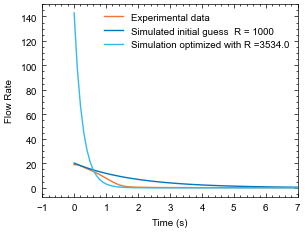

In [38]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define P_amb and initial guess for R_valve
P_amb = 1e5  # Ambient pressure in Pascals
R_valve_initial_guess = 1000  # Initial guess for R_valve

# Given data
P1_max = max(P1) + P_amb  # Assuming P1 is defined

# V_tank value
V_tank = 0.525e-3

# System of ODEs with R_valve as a parameter
def dPdt(P, t, R_valve):
    P_tank = P[0]
    Q_tank_to_amb = (P_tank - P_amb) / R_valve
    dP_tank_dt = -Q_tank_to_amb / V_tank
    return [dP_tank_dt]

# Function to integrate the ODEs and calculate flow rate
def model(t, R_valve):
    P_tank = odeint(dPdt, [P1_max], t, args=(R_valve,))[:, 0]
    Q = (P_tank - P_amb) / R_valve
    return Q

# Fit the model to the experimental data
popt, _ = curve_fit(model, t_Q1_from_max, Q1_from_max, p0=[R_valve_initial_guess])

# Extract the optimized R_valve
R_valve_optimized = popt[0]

# Run simulation with optimized R_valve
Q_P1_max_optimized = model(t_sim, R_valve_optimized)

# Plotting

plt.plot(t_Q1_from_max, Q1_from_max, label='Experimental data')
plt.plot(t_sim, Q_P1_max_optimized, label=f'Simulated initial guess  R = {R_valve_initial_guess} ')
plt.plot(t_sim, Q_P1_max, label=f'Simulation optimized with R ={round(R_valve_optimized,0)}')
plt.xlabel('Time (s)')
plt.xlim(-1,7)
plt.ylabel('Flow Rate')
plt.legend()
plt.show()


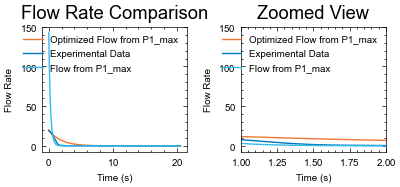

In [30]:
import matplotlib.pyplot as plt

# Assuming t_sim, Q_P1_max_optimized, Q1_from_max, t_Q1_from_max, and Q_P1_max are defined in your environment

cm = 1/2.54
w = 10.7*cm
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(w, w/2))

# Plotting the data in the first subplot
ax1.plot(t_sim, Q_P1_max_optimized, label='Optimized Flow from P1_max')
ax1.plot(t_Q1_from_max, Q1_from_max, label='Experimental Data')
ax1.plot(t_sim, Q_P1_max, label='Flow from P1_max')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Flow Rate')
ax1.legend()
ax1.set_title('Flow Rate Comparison')

# Plotting the same data in the second subplot with a zoomed-in view
# Specify the zoom range here (adjust as needed)
zoom_range = [1, 2]  # Example: Zoom in between 1 second and 2 seconds
ax2.plot(t_sim, Q_P1_max_optimized, label='Optimized Flow from P1_max')
ax2.plot(t_Q1_from_max, Q1_from_max, label='Experimental Data')
ax2.plot(t_sim, Q_P1_max, label='Flow from P1_max')
ax2.set_xlim(zoom_range)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Flow Rate')
ax2.legend()
ax2.set_title('Zoomed View')

plt.tight_layout()
plt.show()


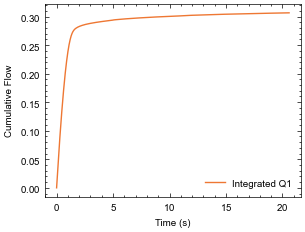

In [23]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

# Assuming t_Q1_from_max and Q1_from_max are defined and represent your experimental time and flow data
# Replace these with your actual data variables

# Integrate the experimental flow data with respect to time
integrated_Q1 = cumtrapz(Q1_from_max/60, t_Q1_from_max, initial=0)

# Plotting the integrated data
plt.plot(t_Q1_from_max, integrated_Q1, label='Integrated Q1')
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Flow')
plt.legend()
plt.show()


In [24]:
sum(integrated_Q1)

5979.440302119564